<h1>Auto-MPG Regression - ANN</h1>

MPG steht für Miles-per-gallon. Ziel ist es den Verbrauch von Fahrzeugen vorherzusagen.

Dataset:<br>

>Auto-mpg dataset - Mileage per gallon performances of various cars <br>
> https://www.kaggle.com/datasets/uciml/autompg-dataset [Letzter Zugriff: 06.07.2024]

In [1]:
# Imorts.
import tensorflow as tf
import pandas     as pd
import seaborn   as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing   import MinMaxScaler
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics         import r2_score

In [2]:
# Lade Daten in Dataframe.
data_df = pd.read_csv('./data/datasets/Auto_mpg.zip', compression='zip')
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data_df.shape

(398, 9)

In [4]:
# Lösche Spalte "car name"
data_df.drop(['car name'], axis="columns", inplace=True)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [6]:
data_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [7]:
data_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
data_df.describe(include='object')

,horsepower
count,398
unique,94
top,150
freq,22


In [9]:
data_df['horsepower'] = pd.to_numeric(data_df['horsepower'], errors='coerce')

In [10]:
data_df['horsepower'].isna().sum()

6

Fülle Lücken mit Durchschnitt. 

In [11]:
data_df['horsepower'].fillna(data_df['horsepower'].mean())

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


Alle Daten sind numerisch vorhanden und haben keine undefinierten Werte. 

Mit den Boxplot von Seaborn können wir uns Outlier anzeigen lassen.

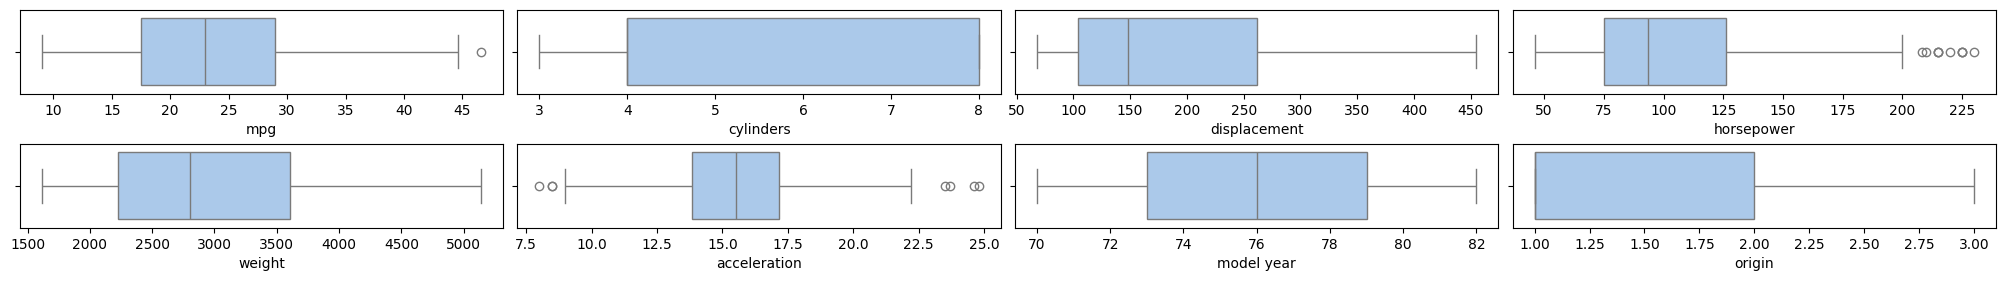

In [14]:
plt.figure(figsize=(20,5))

target = list(data_df.columns)

for i in range(len(target)) :
    plt.tight_layout(pad=0.5)
    plt.subplot(round(len(target)/2),4, i+1)
    sn.boxplot(x=data_df[target[i]], palette="pastel", legend=False, hue=0)

In [15]:
# Wir können Outlier mit der Standardabweichung entfernen.
shape_before = data_df.shape[0]

target =  ['acceleration', 'horsepower']

for col in target:
    high_limit = data_df[col].mean() + 3 * data_df[col].std()
    low_limit  = data_df[col].mean() - 3 * data_df[col].std()
    print(f"col: {col}, low_limit: {low_limit}, high_limit: {high_limit}")
    data_df = data_df[(data_df[col]<high_limit) & (data_df[col]>low_limit) ]
print(f'shape before: {shape_before}, shape now: {data_df.shape[0]}')

col: acceleration, low_limit: 7.295023662823279, high_limit: 23.841157241699335
col: horsepower, low_limit: -10.690628034805712, high_limit: 220.07011521429288
shape before: 398, shape now: 386


In [16]:
data_df['horsepower'].max()

220.0

In [17]:
X, y = data_df.drop(['mpg'], axis='columns'),  data_df['mpg']

In [18]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape

(308, 7)

<h2>Model Building</h2>

Verschiedene Skalierungen liefern verschiedene Ergebnisse.
- Dabei haben verschiedene Skalierungen verschiedenen Parameter, die das Ergebnis beeinflussen.

In [25]:
# Plot Loss und Epoche.
def creat_loss_plot(history):
    plt.plot(history['loss'], label='loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [mpg]')
    plt.legend()
    plt.grid(True)

In [54]:
# # MinMax Scaler # #

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
X_test_scaled  = scaler.fit_transform(X_test)
y_test_scaled  = scaler.fit_transform(y_test.values.reshape(-1, 1))

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=7, activation='relu',  kernel_initializer="ones"),  # L1 
    tf.keras.layers.Dense(units=1)  # L2 
])
model.compile(
    optimizer='adam',
    loss     ='mean_absolute_error' # oder: mean_squared_error
)

history_minmax = model.fit(X_train_scaled, y_train_scaled, epochs=120)

Epoch 1/120
10/10 [==============================] - 0s 888us/step - loss: 0.4624
Epoch 2/120
10/10 [==============================] - 0s 889us/step - loss: 0.2400
Epoch 3/120
10/10 [==============================] - 0s 778us/step - loss: 0.2081
Epoch 4/120
10/10 [==============================] - 0s 778us/step - loss: 0.1948
Epoch 5/120
10/10 [==============================] - 0s 778us/step - loss: 0.1665
Epoch 6/120
10/10 [==============================] - 0s 778us/step - loss: 0.1468
Epoch 7/120
10/10 [==============================] - 0s 889us/step - loss: 0.1287
Epoch 8/120
10/10 [==============================] - 0s 1ms/step - loss: 0.1129
Epoch 9/120
10/10 [==============================] - 0s 1ms/step - loss: 0.1009
Epoch 10/120
10/10 [==============================] - 0s 1ms/step - loss: 0.0940
Epoch 11/120
10/10 [==============================] - 0s 1ms/step - loss: 0.0906
Epoch 12/120
10/10 [==============================] - 0s 778us/step - loss: 0.0887
Epoch 13/120
10/10 [=

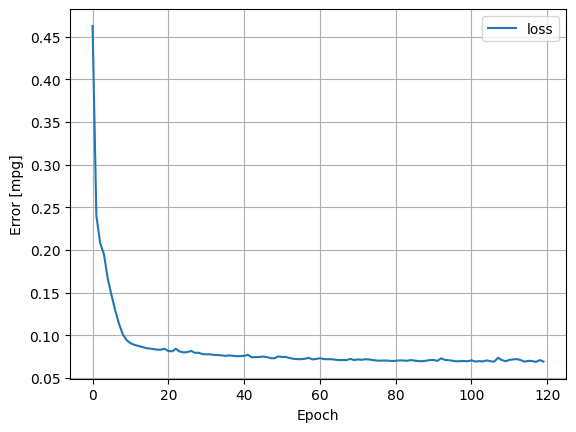

In [55]:
hist = pd.DataFrame(history_minmax.history)
hist['epoch'] = history_minmax.epoch
creat_loss_plot(hist)

In [56]:
# Nutze ggf. inverse Transformation. 
r2_score(y_test_scaled,  model.predict(X_test_scaled))
# 0.6908282373102439

3/3 [==============================] - 0s 999us/step


0.6849067292510871

In [66]:
# # STD Scaler # #
scaler_std = StandardScaler()
scaler     = MinMaxScaler()
X_train_scaled = scaler_std.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
X_test_scaled  = scaler_std.fit_transform(X_test)
y_test_scaled  = scaler.fit_transform(y_test.values.reshape(-1, 1))

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=7, activation='relu'),  # L1 
    tf.keras.layers.Dense(units=1)  # L2 
])
model.compile(
    optimizer='adam',
    loss     = 'mean_squared_error'#'mean_absolute_error'
)

history_std = model.fit(X_train_scaled, y_train_scaled, epochs=120)

Epoch 1/120
10/10 [==============================] - 0s 889us/step - loss: 0.3477
Epoch 2/120
10/10 [==============================] - 0s 778us/step - loss: 0.2590
Epoch 3/120
10/10 [==============================] - 0s 889us/step - loss: 0.2032
Epoch 4/120
10/10 [==============================] - 0s 888us/step - loss: 0.1711
Epoch 5/120
10/10 [==============================] - 0s 892us/step - loss: 0.1472
Epoch 6/120
10/10 [==============================] - 0s 892us/step - loss: 0.1277
Epoch 7/120
10/10 [==============================] - 0s 781us/step - loss: 0.1128
Epoch 8/120
10/10 [==============================] - 0s 889us/step - loss: 0.0993
Epoch 9/120
10/10 [==============================] - 0s 889us/step - loss: 0.0888
Epoch 10/120
10/10 [==============================] - 0s 888us/step - loss: 0.0785
Epoch 11/120
10/10 [==============================] - 0s 887us/step - loss: 0.0703
Epoch 12/120
10/10 [==============================] - 0s 889us/step - loss: 0.0635
Epoch 13/120


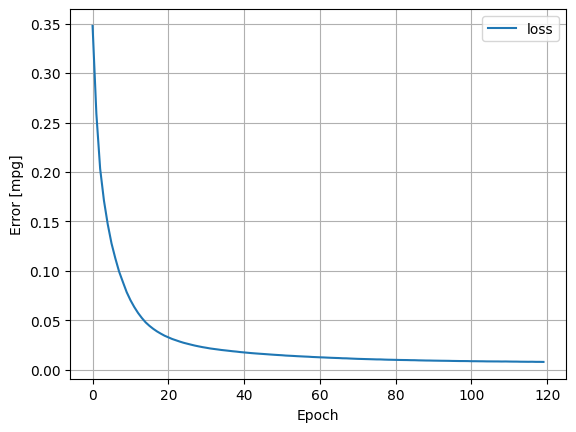

In [67]:
hist = pd.DataFrame(history_std.history)
hist['epoch'] = history_std.epoch
creat_loss_plot(hist)

In [68]:
r2_score(y_test_scaled,  model.predict(X_test_scaled))
# 0.6613878293879538

3/3 [==============================] - 0s 1000us/step


0.6613878293879538

In [70]:
# # TF Normalisierungs-Layer # #

# axix = 1 
data_normalizer = tf.keras.layers.Normalization(input_shape=[7,], axis=None)
data_normalizer.adapt(X_train)

scaler = MinMaxScaler()

model = tf.keras.Sequential([
    data_normalizer,
    tf.keras.layers.Dense(units=7, activation='relu',  kernel_initializer="ones"),  # L1 
    tf.keras.layers.Dense(units=1)  # L2 
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), #'adam', Passe lr an.
    loss     ='mean_absolute_error'
)

history_normlayer = model.fit(X_train, y_train, epochs=120)

Epoch 1/120
10/10 [==============================] - 0s 889us/step - loss: 17.3087
Epoch 2/120
10/10 [==============================] - 0s 997us/step - loss: 10.8766
Epoch 3/120
10/10 [==============================] - 0s 1000us/step - loss: 9.5190
Epoch 4/120
10/10 [==============================] - 0s 889us/step - loss: 8.1993
Epoch 5/120
10/10 [==============================] - 0s 778us/step - loss: 7.2627
Epoch 6/120
10/10 [==============================] - 0s 778us/step - loss: 6.4277
Epoch 7/120
10/10 [==============================] - 0s 778us/step - loss: 5.3786
Epoch 8/120
10/10 [==============================] - 0s 781us/step - loss: 3.8857
Epoch 9/120
10/10 [==============================] - 0s 778us/step - loss: 3.3970
Epoch 10/120
10/10 [==============================] - 0s 889us/step - loss: 3.2612
Epoch 11/120
10/10 [==============================] - 0s 889us/step - loss: 3.1089
Epoch 12/120
10/10 [==============================] - 0s 889us/step - loss: 3.1012
Epoch 13/1

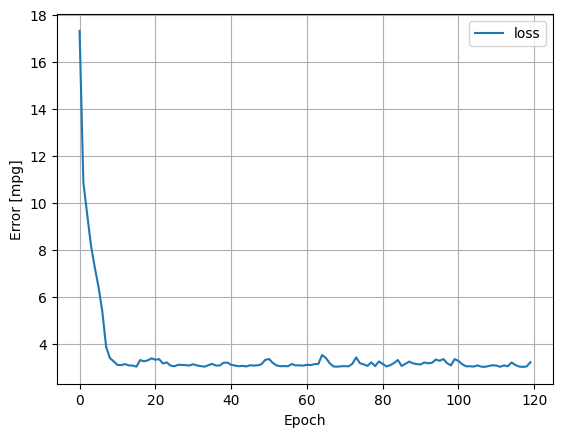

In [71]:
hist = pd.DataFrame(history_normlayer.history)
hist['epoch'] = history_normlayer.epoch
creat_loss_plot(hist)

In [72]:
r2_score(y_test,  model.predict(X_test))
# 0.8467401669605009

3/3 [==============================] - 0s 986us/step


0.8467401669605009

In [73]:
# # TF Normalisierungs-Layer # #
# - DNN

data_normalizer = tf.keras.layers.Normalization(input_shape=[7,], axis=None)
data_normalizer.adapt(X_train)

model = tf.keras.Sequential([
    data_normalizer,
    tf.keras.layers.Dense(units=7, activation='relu',  kernel_initializer="ones"),  
    tf.keras.layers.Dense(units=28, activation='relu'),
    tf.keras.layers.Dense(units=14, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #'adam', Passe lr an.
    loss     ='mean_absolute_error'
)

history_normlayer = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 22.3438
Epoch 2/100
10/10 [==============================] - 0s 1000us/step - loss: 18.4436
Epoch 3/100
10/10 [==============================] - 0s 997us/step - loss: 16.3264
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 13.9558
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 12.1008
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 9.5553
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 5.7461
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 3.9411
Epoch 9/100
10/10 [==============================] - 0s 1000us/step - loss: 3.7098
Epoch 10/100
10/10 [==============================] - 0s 889us/step - loss: 4.3635
Epoch 11/100
10/10 [==============================] - 0s 1ms/step - loss: 3.4906
Epoch 12/100
10/10 [==============================] - 0s 889us/step - loss: 3.2663
Epoch 13/100
10/10 [

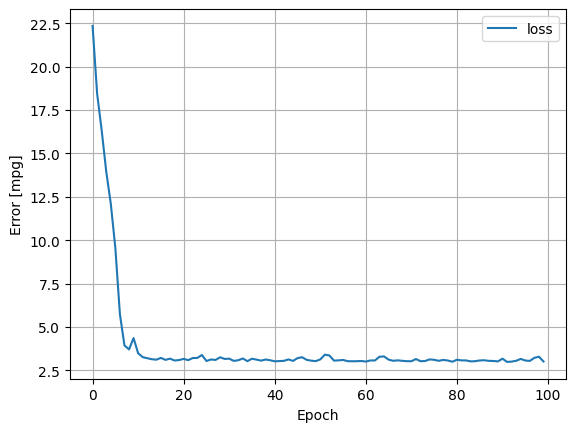

In [74]:
hist = pd.DataFrame(history_normlayer.history)
hist['epoch'] = history_normlayer.epoch
creat_loss_plot(hist)

In [75]:
r2_score(y_test,  model.predict(X_test))
# 0.8246576188606918

3/3 [==============================] - 0s 2ms/step


0.8246576188606918

In [84]:
# #  Nicht skaliert # #
# - Schlechtestes Ergebnis. 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=7, activation='relu'),  # L1 
    tf.keras.layers.Dense(units=1)  # L2 
])
model.compile(
    optimizer='adam',
    loss     = 'mean_squared_error' #'mean_absolute_error'
)

history_unscaled = model.fit(X_train, y_train, epochs=120)

Epoch 1/120
10/10 [==============================] - 0s 889us/step - loss: 443336.4688
Epoch 2/120
10/10 [==============================] - 0s 885us/step - loss: 354791.7500
Epoch 3/120
10/10 [==============================] - 0s 890us/step - loss: 275683.0000
Epoch 4/120
10/10 [==============================] - 0s 779us/step - loss: 209112.0781
Epoch 5/120
10/10 [==============================] - 0s 886us/step - loss: 154783.9062
Epoch 6/120
10/10 [==============================] - 0s 775us/step - loss: 111089.8438
Epoch 7/120
10/10 [==============================] - 0s 778us/step - loss: 77353.6641
Epoch 8/120
10/10 [==============================] - 0s 775us/step - loss: 52193.4258
Epoch 9/120
10/10 [==============================] - 0s 889us/step - loss: 34072.2891
Epoch 10/120
10/10 [==============================] - 0s 775us/step - loss: 21701.6289
Epoch 11/120
10/10 [==============================] - 0s 778us/step - loss: 13382.7969
Epoch 12/120
10/10 [==========================

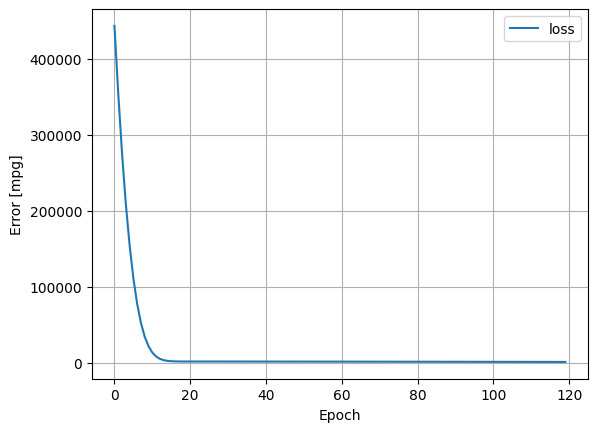

In [85]:
hist = pd.DataFrame(history_unscaled.history)
hist['epoch'] = history_unscaled.epoch
creat_loss_plot(hist)

In [86]:
r2_score(y_test,  model.predict(X_test))
# -13.823956632728114

3/3 [==============================] - 0s 1ms/step


-13.823956632728114

Durch das Skalieren läuft das Training stabiler und man erreicht schneller das Minimum. Features mit sehr großen Werten haben einen starken Einfluss und können das Model in eine andere Richtung ziehen.

Ja nach Dataset und Komplexität können verschiedene Methoden für das Skalieren der Daten angewendet werden. Dabei kann auch y skaliert werden, wenn es sich um eine fortlaufende Zahl handelt. <br>
Welche Koeffizienten und Bias die Neuronen zu Beginn haben, spielt auch eine Rolle.

Gut bei kleineren Datasets ist, dass man schnell verschiedene Möglichkeiten testen kann und so ein besseres Gefühl für diese Problemart bekommt.